In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm
import numpy as np

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]

samples_2mu = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]


samples_bkg = [
    "TTJets",
]

In [3]:
# fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=2, location_cfg="signal_v6.yaml")
# fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=2, location_cfg="backgrounds.yaml")
# fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=2, location_cfg="signal_v6.yaml")
    
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["abcd_base", "lj_lj_base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

Warning: a histogram with the name lj_lj_absdphi_iso2 could not be filled and will be skipped

In [4]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]

samples_2mu = [
    "TTJets",
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

In [5]:
BKG_4mu = out_4mu[samples_4mu[0]]["hists"]
SIG_1_4mu = out_4mu[samples_4mu[1]]["hists"]
SIG_2_4mu = out_4mu[samples_4mu[2]]["hists"]
SIG_3_4mu = out_4mu[samples_4mu[3]]["hists"]
SIG_4_4mu = out_4mu[samples_4mu[4]]["hists"]
SIG_5_4mu = out_4mu[samples_4mu[5]]["hists"]

BKG_2mu = out_2mu[samples_2mu[0]]["hists"]
SIG_1_2mu = out_2mu[samples_2mu[1]]["hists"]
SIG_2_2mu = out_2mu[samples_2mu[2]]["hists"]
SIG_3_2mu = out_2mu[samples_2mu[3]]["hists"]
SIG_4_2mu = out_2mu[samples_2mu[4]]["hists"]
SIG_5_2mu = out_2mu[samples_2mu[5]]["hists"]

In [6]:
def plot_2d_nozero(sample, variable):
    hist = sample["{0}".format(variable)][channels[0], :, :]
    hist.values()[hist.values()==0] = np.nan
    return hist

Text(0.5, 1.0, 'TTJets')

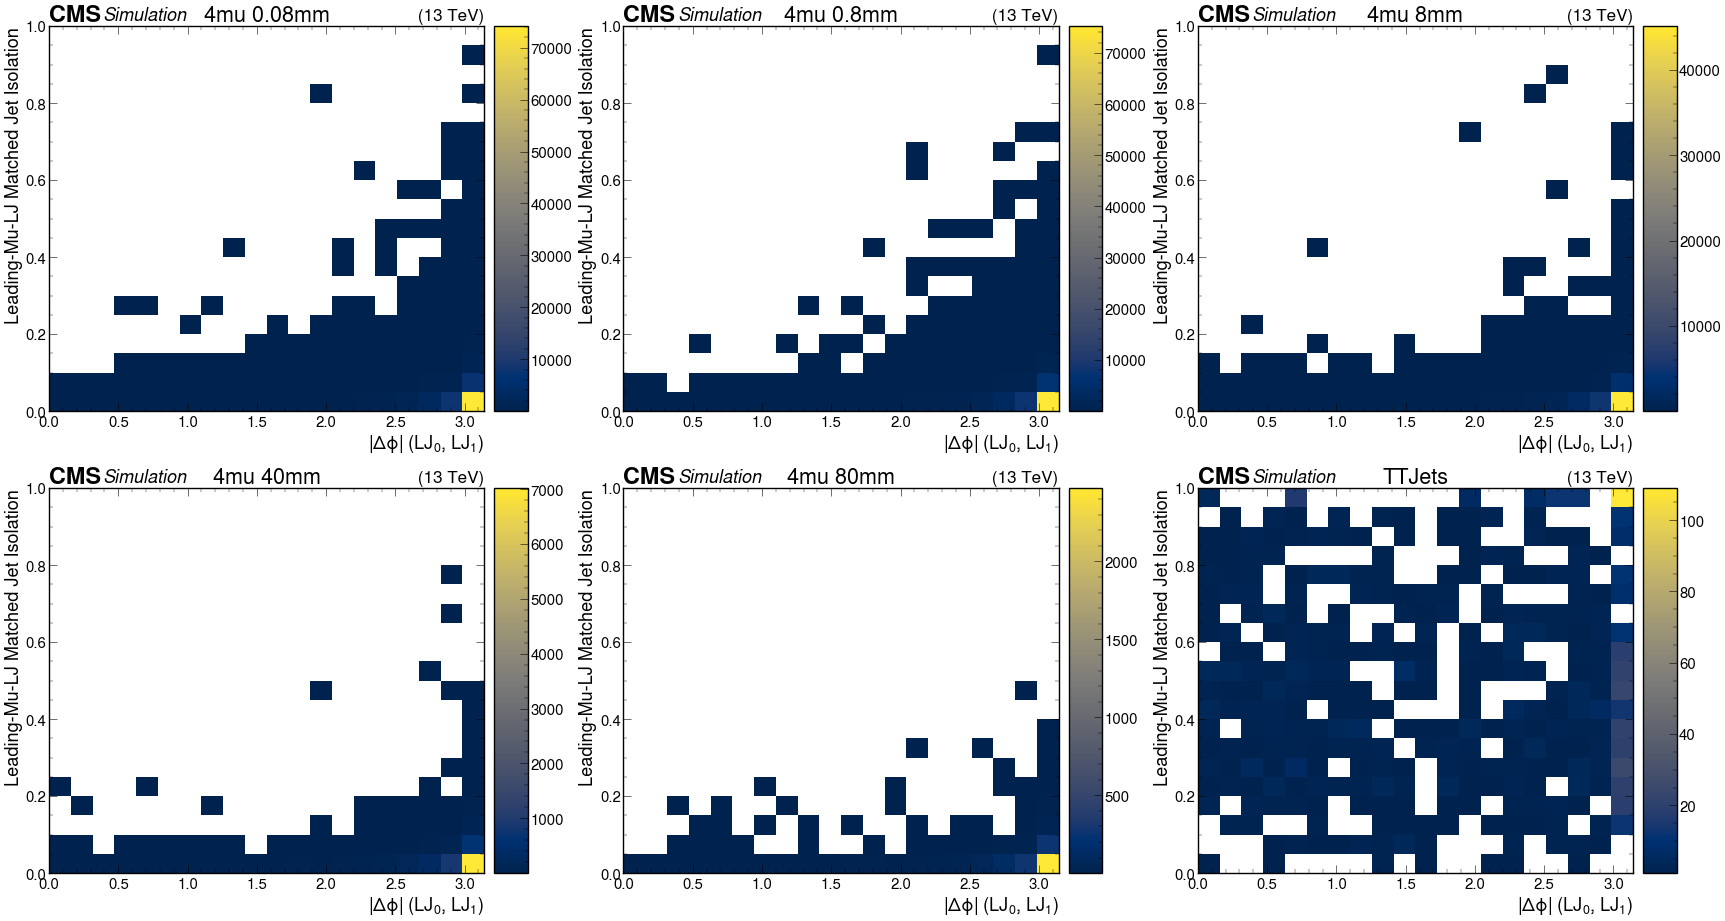

In [7]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(plot_2d_nozero(SIG_1_4mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(plot_2d_nozero(SIG_2_4mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(plot_2d_nozero(SIG_3_4mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(plot_2d_nozero(SIG_4_4mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(plot_2d_nozero(SIG_5_4mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(plot_2d_nozero(BKG_4mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

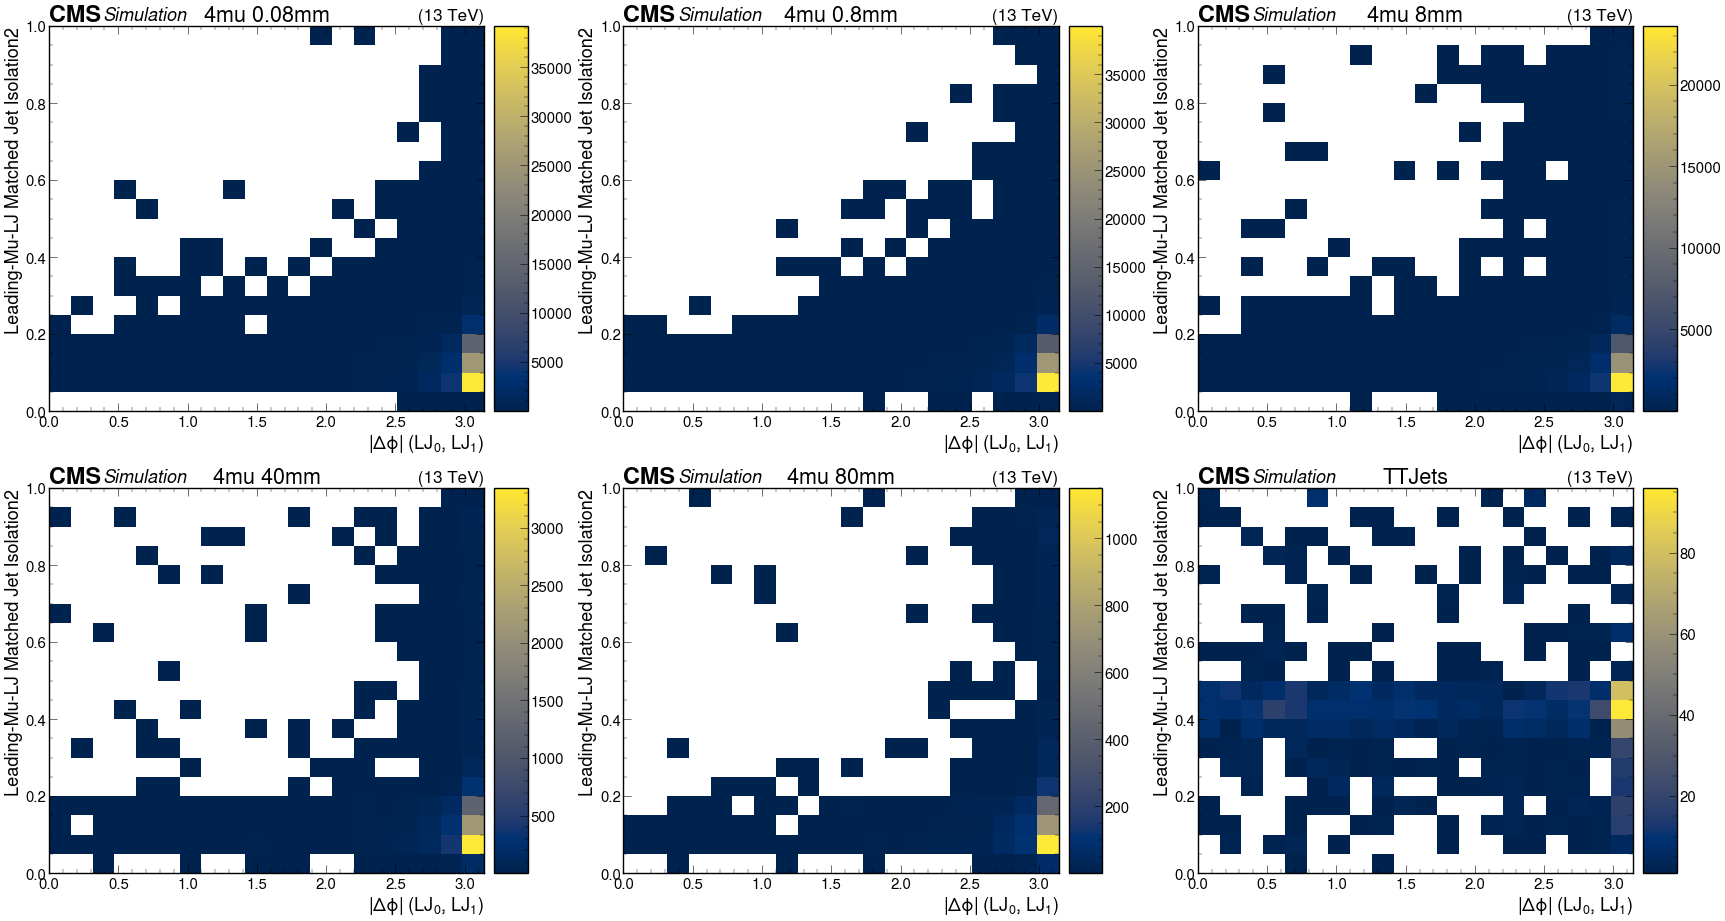

In [8]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(plot_2d_nozero(SIG_1_4mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(plot_2d_nozero(SIG_2_4mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(plot_2d_nozero(SIG_3_4mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(plot_2d_nozero(SIG_4_4mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(plot_2d_nozero(SIG_5_4mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(plot_2d_nozero(BKG_4mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

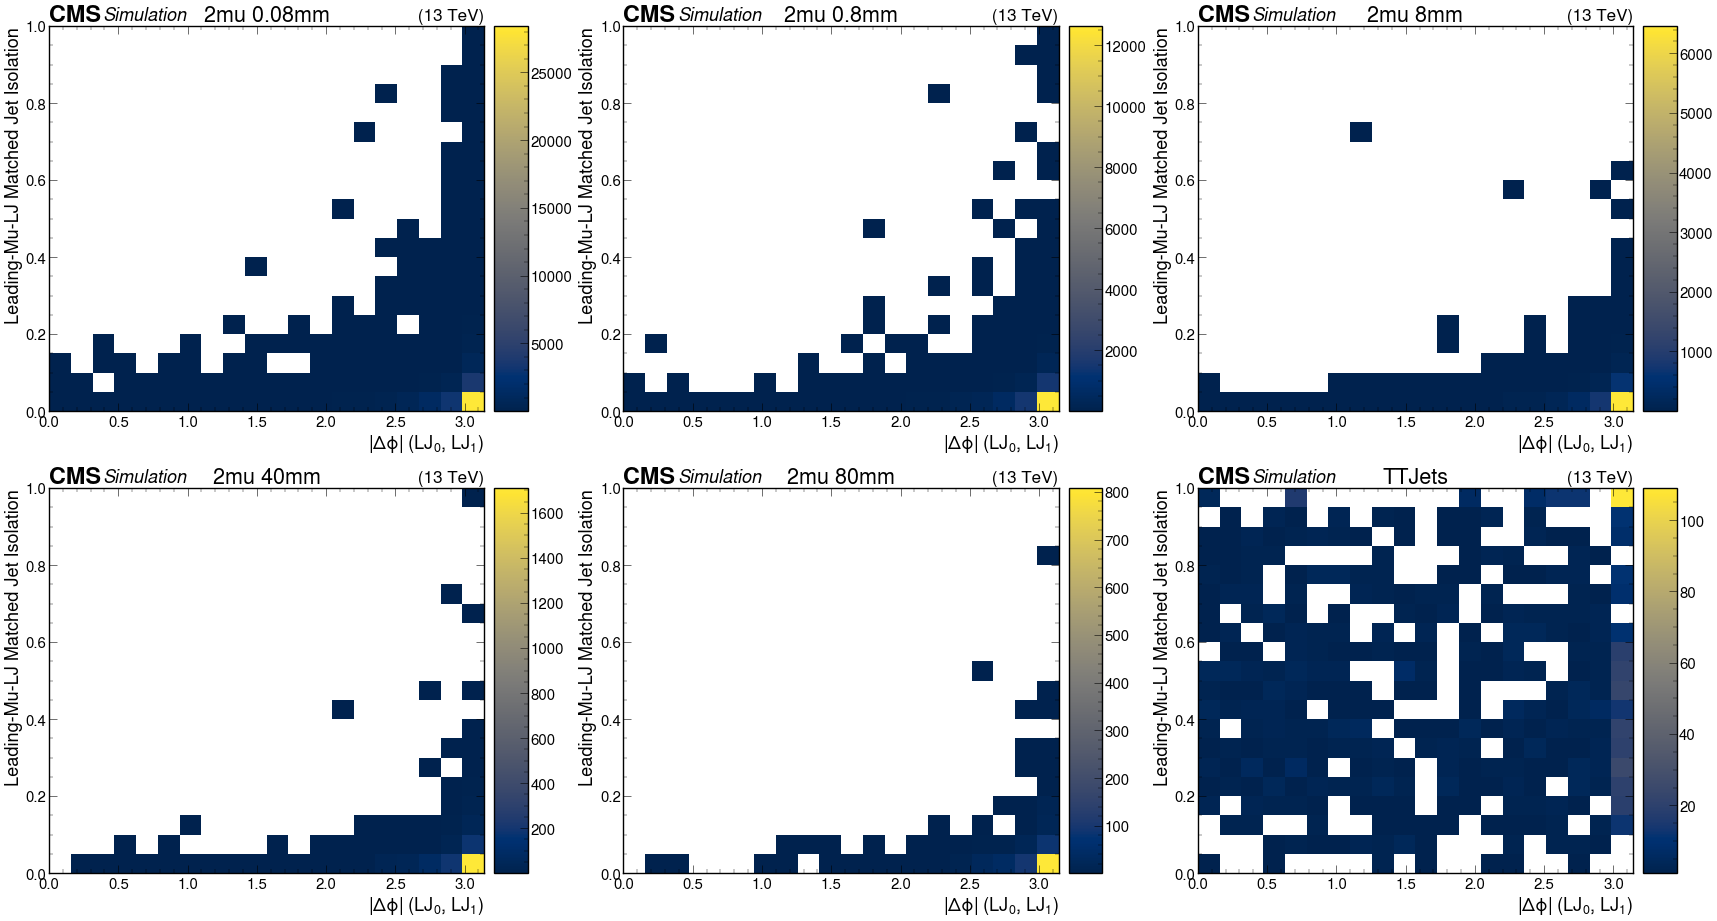

In [9]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(plot_2d_nozero(SIG_1_2mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("2mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(plot_2d_nozero(SIG_2_2mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("2mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(plot_2d_nozero(SIG_3_2mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("2mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(plot_2d_nozero(SIG_4_2mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("2mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(plot_2d_nozero(SIG_5_2mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("2mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(plot_2d_nozero(BKG_2mu, "lj_lj_absdphi_iso1"), cmap = "cividis")
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

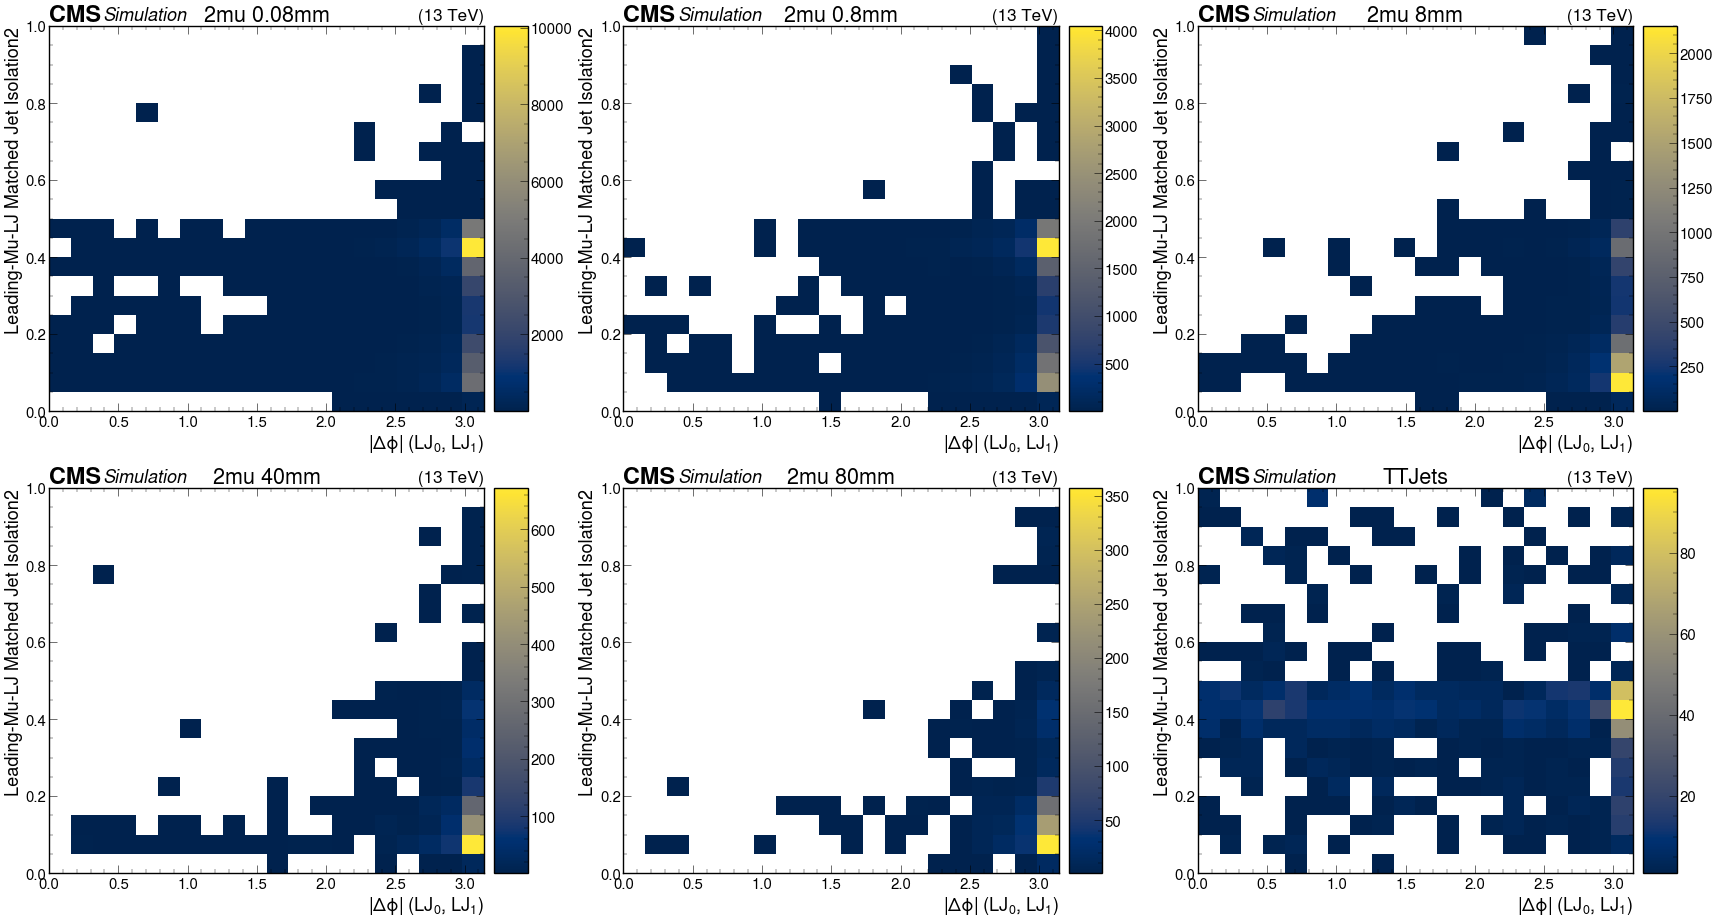

In [10]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(plot_2d_nozero(SIG_1_2mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("2mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(plot_2d_nozero(SIG_2_2mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("2mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(plot_2d_nozero(SIG_3_2mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("2mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(plot_2d_nozero(SIG_4_2mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("2mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(plot_2d_nozero(SIG_5_2mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("2mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(plot_2d_nozero(BKG_2mu, "lj_lj_absdphi_iso2"), cmap = "cividis")
plt.title("TTJets")